In [2]:
import pandas as pd
import numpy as np
import requests
import json
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
fires_pd = pd.read_csv("fires.csv", lineterminator='\n', low_memory=False)
fires_pd.head()


,OBJECTID,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,...,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_CODE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME,Shape
0,1,1,FS-1418826,FED,FS-FIRESTAT,FS,USCAPNF,Plumas National Forest,0511,Plumas National Forest,...,A,40.036944,-121.005833,5.0,USFS,CA,63,63.0,Plumas,NaN
1,2,2,FS-1418827,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,A,38.933056,-120.404444,5.0,USFS,CA,61,61.0,Placer,NaN
2,3,3,FS-1418835,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,A,38.984167,-120.735556,13.0,STATE OR PRIVATE,CA,17,17.0,El Dorado,NaN
3,4,4,FS-1418845,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,A,38.559167,-119.913333,5.0,USFS,CA,3,3.0,Alpine,NaN
4,5,5,FS-1418847,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,A,38.559167,-119.933056,5.0,USFS,CA,3,3.0,Alpine,NaN


In [4]:
list(fires_pd.columns.values)

['OBJECTID',
 'FOD_ID',
 'FPA_ID',
 'SOURCE_SYSTEM_TYPE',
 'SOURCE_SYSTEM',
 'NWCG_REPORTING_AGENCY',
 'NWCG_REPORTING_UNIT_ID',
 'NWCG_REPORTING_UNIT_NAME',
 'SOURCE_REPORTING_UNIT',
 'SOURCE_REPORTING_UNIT_NAME',
 'LOCAL_FIRE_REPORT_ID',
 'LOCAL_INCIDENT_ID',
 'FIRE_CODE',
 'FIRE_NAME',
 'ICS_209_INCIDENT_NUMBER',
 'ICS_209_NAME',
 'MTBS_ID',
 'MTBS_FIRE_NAME',
 'COMPLEX_NAME',
 'FIRE_YEAR',
 'DISCOVERY_DATE',
 'DISCOVERY_DOY',
 'DISCOVERY_TIME',
 'STAT_CAUSE_CODE',
 'STAT_CAUSE_DESCR',
 'CONT_DATE',
 'CONT_DOY',
 'CONT_TIME',
 'FIRE_SIZE',
 'FIRE_SIZE_CLASS',
 'LATITUDE',
 'LONGITUDE',
 'OWNER_CODE',
 'OWNER_DESCR',
 'STATE',
 'COUNTY',
 'FIPS_CODE',
 'FIPS_NAME',
 'Shape']

In [5]:
# Dropping columns
fire_drop_na = fires_pd.dropna(axis=1)
# fires_drop = fires_pd.drop(["OBJECTID"], ["FOD_ID"], ["FPA_ID"], ["SOURCE_SYSTEM_TYPE"], ["NWCG_REPORTING_AGENCY"], ["NWCG_REPORTING_UNIT_ID"], ["NWCG_REPORTING_UNIT_NAME"], ["SOURCE_REPORTING_UNIT"], ["OWNER_CODE"], ["OWNER_DESCR"], ["STAT_CAUSE_CODE"], ["DISCOVERY_DOY"]axis=1)
fire_drop_na.head()

,OBJECTID,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,...,DISCOVERY_DOY,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_CODE,OWNER_DESCR,STATE
0,1,1,FS-1418826,FED,FS-FIRESTAT,FS,USCAPNF,Plumas National Forest,0511,Plumas National Forest,...,33,9.0,Miscellaneous,0.10,A,40.036944,-121.005833,5.0,USFS,CA
1,2,2,FS-1418827,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,133,1.0,Lightning,0.25,A,38.933056,-120.404444,5.0,USFS,CA
2,3,3,FS-1418835,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,152,5.0,Debris Burning,0.10,A,38.984167,-120.735556,13.0,STATE OR PRIVATE,CA
3,4,4,FS-1418845,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,180,1.0,Lightning,0.10,A,38.559167,-119.913333,5.0,USFS,CA
4,5,5,FS-1418847,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,180,1.0,Lightning,0.10,A,38.559167,-119.933056,5.0,USFS,CA


In [6]:
list(fire_drop_na.columns.values)

['OBJECTID',
 'FOD_ID',
 'FPA_ID',
 'SOURCE_SYSTEM_TYPE',
 'SOURCE_SYSTEM',
 'NWCG_REPORTING_AGENCY',
 'NWCG_REPORTING_UNIT_ID',
 'NWCG_REPORTING_UNIT_NAME',
 'SOURCE_REPORTING_UNIT',
 'SOURCE_REPORTING_UNIT_NAME',
 'FIRE_YEAR',
 'DISCOVERY_DATE',
 'DISCOVERY_DOY',
 'STAT_CAUSE_CODE',
 'STAT_CAUSE_DESCR',
 'FIRE_SIZE',
 'FIRE_SIZE_CLASS',
 'LATITUDE',
 'LONGITUDE',
 'OWNER_CODE',
 'OWNER_DESCR',
 'STATE']

In [8]:
fires_drop_1 = fire_drop_na.drop(["OBJECTID", "FPA_ID", "SOURCE_SYSTEM_TYPE", "NWCG_REPORTING_AGENCY", "FPA_ID", "SOURCE_SYSTEM_TYPE", "NWCG_REPORTING_AGENCY", "NWCG_REPORTING_UNIT_ID", "NWCG_REPORTING_UNIT_NAME", "OWNER_CODE", "OWNER_DESCR", "OWNER_DESCR", "STAT_CAUSE_CODE", "DISCOVERY_DOY", "SOURCE_REPORTING_UNIT"], axis=1)


In [9]:
list(fires_drop_1.columns.values)

['FOD_ID',
 'SOURCE_SYSTEM',
 'SOURCE_REPORTING_UNIT_NAME',
 'FIRE_YEAR',
 'DISCOVERY_DATE',
 'STAT_CAUSE_DESCR',
 'FIRE_SIZE',
 'FIRE_SIZE_CLASS',
 'LATITUDE',
 'LONGITUDE',
 'STATE']

In [10]:
fire_clean = fires_drop_1.drop(["DISCOVERY_DATE"], axis=1)

In [11]:
fire_clean.head()

,FOD_ID,SOURCE_SYSTEM,SOURCE_REPORTING_UNIT_NAME,FIRE_YEAR,STAT_CAUSE_DESCR,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,STATE
0,1,FS-FIRESTAT,Plumas National Forest,2005,Miscellaneous,0.10,A,40.036944,-121.005833,CA
1,2,FS-FIRESTAT,Eldorado National Forest,2004,Lightning,0.25,A,38.933056,-120.404444,CA
2,3,FS-FIRESTAT,Eldorado National Forest,2004,Debris Burning,0.10,A,38.984167,-120.735556,CA
3,4,FS-FIRESTAT,Eldorado National Forest,2004,Lightning,0.10,A,38.559167,-119.913333,CA
4,5,FS-FIRESTAT,Eldorado National Forest,2004,Lightning,0.10,A,38.559167,-119.933056,CA


In [12]:
fire_clean.to_csv("fire_clean.csv", index=False)

In [13]:
print(fire_clean["FIRE_YEAR"].min())
print(fire_clean["FIRE_YEAR"].max())

1992
2015


In [23]:
# To pick our top states:
#     1.All states count of fires
#     2.All states total size of fires

state_names = fire_clean["STATE"].value_counts()

CA    189550
GA    168867
TX    142021
NC    111277
FL     90261
SC     81315
NY     80870
MS     79230
AZ     71586
AL     66570
OR     61088
MN     44769
OK     43239
MT     40767
NM     37478
ID     36698
CO     34157
WA     33513
WI     31861
AR     31663
TN     31154
SD     30963
UT     30725
LA     30013
KY     27089
NJ     25949
PR     22081
WV     21967
VA     21833
MO     17953
NV     16956
ND     15201
WY     14166
ME     13150
AK     12843
MI     10502
HI      9895
PA      8712
NE      7973
KS      7673
CT      4976
IA      4134
MD      3622
OH      3479
MA      2626
NH      2452
IL      2327
IN      2098
RI       480
VT       456
DE       171
DC        66
Name: STATE, dtype: int64

In [14]:
state_total_fire = fire_clean.pivot_table(index="STATE", columns="FIRE_SIZE_CLASS", values="FIRE_SIZE", aggfunc=np.sum).reset_index().rename_axis(None, axis=1)

In [16]:
state_total_fire


,STATE,A,B,C,D,E,F,G
0,AK,731.670000,6352.380000,36870.900000,61724.09999,210918.10001,1.026419e+06,3.089008e+07
1,AL,1173.985000,109178.440000,492294.130000,162712.70000,97012.50000,5.817350e+04,NaN
2,AR,109.960000,58579.770000,242898.710000,81022.09001,62954.30000,4.996200e+04,1.338500e+04
3,AZ,4919.835000,39562.699000,121663.910000,140900.30999,308078.55000,9.083035e+05,4.053252e+06
4,CA,11015.602000,124064.780000,289694.930000,345499.01000,620129.27000,1.620973e+06,9.734482e+06
5,CO,2610.120000,12484.320000,44502.750000,59603.10000,143471.40000,3.409113e+05,1.238726e+06
6,CT,344.910000,3525.200000,3795.200000,1917.00000,361.00000,1.300000e+03,NaN
7,DC,4.900000,27.600000,NaN,NaN,NaN,NaN,NaN
8,DE,7.900000,151.250000,344.500000,580.00000,500.00000,3.250000e+03,NaN
9,FL,2491.200000,121978.070000,438244.830000,332859.89997,518498.53998,8.157848e+05,2.206891e+06


,STATE,FIRE_SIZE,FOD_ID,FIRE_YEAR,LATITUDE,LONGITUDE
0,AK,0.01,1472523,6021,173.127500,-414.292778
1,AK,0.10,319648140559,11877502,369402.944370,-875039.368654
2,AK,0.17,301631933,4025,119.846389,-288.222778
3,AK,0.20,25161429608,1339236,41611.919861,-99110.723993
4,AK,0.25,93173703,36144,1035.315556,-2425.220834
...,...,...,...,...,...,...
45808,WY,61416.00,201511570,2012,43.914800,-104.284400
45809,WY,65220.00,201433054,2012,42.434167,-110.600556
45810,WY,68148.00,32030,2008,44.495000,-109.822500
45811,WY,98115.00,201431243,2012,42.200833,-105.490278


In [20]:
state_total_fire['Total Fire Size'] = state_total_fire.sum(axis=1)

In [21]:
clean_state_fire = state_total_fire.dropna()

In [22]:
total_size = clean_state_fire.loc[:, ['STATE', 'Total Fire Size']]

In [23]:
total_size_pd = pd.DataFrame(total_size)

In [24]:
total_size_pd.set_index("STATE")

,Total Fire Size
STATE,
AK,6.446619e+07
AR,1.017824e+06
AZ,1.115336e+07
CA,2.549172e+07
CO,3.684618e+06
FL,8.873496e+06
GA,3.179918e+06
HI,5.055220e+05
ID,2.736867e+07


In [32]:
total_size_pd.sort_values(by=["Total Fire Size"])

,STATE,Total Fire Size
49,WI,1.773505e+05
34,NY,1.875439e+05
31,NJ,2.639271e+05
22,MI,2.804589e+05
11,HI,5.055220e+05
46,VA,6.832916e+05
28,ND,8.252145e+05
43,TN,9.733048e+05
2,AR,1.017824e+06
41,SC,1.083332e+06


# To analyze those states’ data:
1.total fire size per significant statea (pie chart)
2.AVG fire acre size per state 
    a.(Column) BAR Graph 
        i.y-axis: average acres
        ii.x-axis: all states state
3.Total state count of fires YOY (each year’s total count of fires batched by state)
    a.Clustered (column) BAR Graph 
        i.y-axis: count of fires
        ii.x-axis: states (clustered different colors for each year by state)example:

In [26]:
labels = total_size_pd["STATE"]
sizes = total_size_pd["Total Fire Size"]

<function matplotlib.pyplot.legend(*args, **kwargs)>

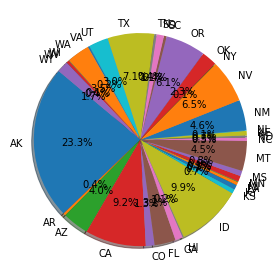

In [27]:
# 1.total fire size per significant statea (pie chart)
plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=140)
plt.tight_layout()

In [ ]:
# 2.AVG fire acre size per state 
#     a.(Column) BAR Graph 
#         i.y-axis: average acres
#         ii.x-axis: all states state